# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [322]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import scipy.stats as stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [294]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [295]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


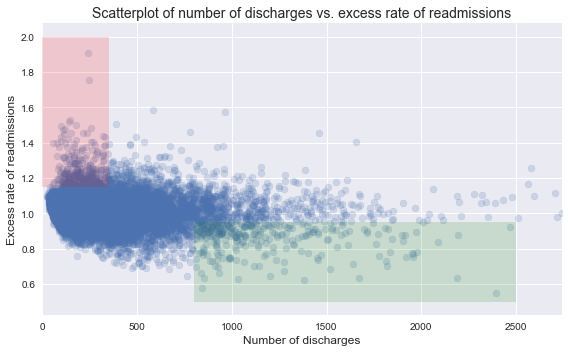

In [296]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [334]:
mydf = clean_hospital_read_df
mydf.shape
#mydf.head()


(11497, 12)

In [335]:
mydf.dropna(subset=['Excess Readmission Ratio','Predicted Readmission Rate','Expected Readmission Rate','Number of Readmissions'], inplace=True)
mydf.shape
#dropna only reduces data set by 81 so it should be ok to do this with such a large data set >11k pts

(11497, 12)

In [314]:
import statsmodels.api as sm

mydf_X = np.log10(mydf['Number of Discharges']).reshape(-1,1)
mydf_Y = mydf['Excess Readmission Ratio'].reshape(-1,1)

results = sm.OLS(mydf_Y, sm.tools.add_constant(mydf_X) ).fit()

const, slope = results.params

print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     110.7
Date:                Wed, 12 Jul 2017   Prob (F-statistic):           8.96e-26
Time:                        10:47:49   Log-Likelihood:                 11178.
No. Observations:               11497   AIC:                        -2.235e+04
Df Residuals:                   11495   BIC:                        -2.234e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.0733      0.006    170.135      0.0

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


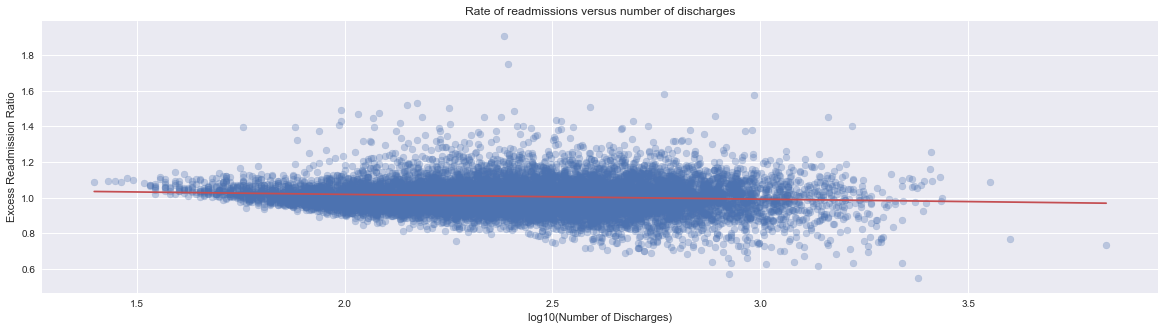

In [316]:
fig, ax = plt.subplots(figsize=(20,5))

plt.scatter(mydf_X, mydf_Y, alpha=0.3)
plt.plot(mydf_X, (const + slope*mydf_X), color = 'r')
plt.title('Rate of readmissions versus number of discharges', fontsize=12)
plt.ylabel('Excess Readmission Ratio')
plt.xlabel('log10(Number of Discharges)')

plt.show()

There is indeed a very small decreasing trend of excess readmission with increasing discharge, however this can be influenced by outliers in the data set and/or missing data values.  The previous report was lacking in any statistical testing so I can agree or disagree with it based on the information to this point.  We shall perform a hypothesis test on the previous report:

B. Statistics

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1

In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1


$$ H_{0} : {\mu}_{gt;1000} = {\mu}_{&lt;100} = {\mu}_{others} $$

Alternative Hypothesis for means of readmission rate:
$ H_{A}:$  ${\mu}_{i}$ is statistically different for all groups

Comparing means here between groups in the null hypothesis requires a one-way ONOVA using 0.05 error rate.

In [346]:
# create data frames for each group based on number of discharges and then get the distribution of Excess Readmission Ratio 
# each new group
df = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'].notnull())]

group_low = df[(df['Number of Discharges'] <= 100)]
group_mid = df[(df['Number of Discharges'] < 1000) & (df['Number of Discharges'] > 100)]
group_high = df[(df['Number of Discharges'] >= 1000)]


In [347]:
lowd = sorted(group_low['Excess Readmission Ratio'])
highd = sorted(group_high['Excess Readmission Ratio'])
midd = sorted(group_mid['Excess Readmission Ratio'])

In [355]:
F, p = stats.f_oneway(lowd, midd, highd)
print ('F statistic =', F)
print ('p-value =', p_val)

F statistic = 39.0889538228
p-value = 2.06046597247e-13


Because the p-value is extremely small we will reject our null hypothesis.  Therefore the conclusion is that there a difference in the groups but we do not know which ones are different. 

From the earlier summary for hosptials with Number of discharge groups >=1000 and <= 100 we will repeat this analysis focused on just those two groups using a ttest and alpha = 0.01.

In [354]:
ttest, p_val = stats.ttest_ind(lowd, highd, equal_var = False)
print ('T-test stat =', ttest)
print ('p-value =', p_val)

T-test stat = 7.5330135221
p-value = 2.06046597247e-13


We can see from both the one-way anova and the ttest, that p < 0.01 and that there is again a statistical signifcance between the two groups selected.  The recommendation would be to expand the analysis into looking at other factors in the data set before making the conclusions in the previous report.